In [8]:
import mxnet as mx
from mxnet import gluon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
import os

In [46]:
os.getcwd()
df = pd.read_csv('C:\\Users\\baesm\\Desktop\\notebookfile/DailyDelhiClimateTrain.csv')
df_test =  pd.read_csv('C:\\Users\\baesm\\Desktop\\notebookfile/DailyDelhiClimateTest.csv')

In [47]:
df.shape,df_test.shape

((1462, 5), (114, 5))

In [58]:
data = df.drop([1461])
data = df.drop(columns=['date']) #drop date column


In [71]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [48]:
df.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


<AxesSubplot:>

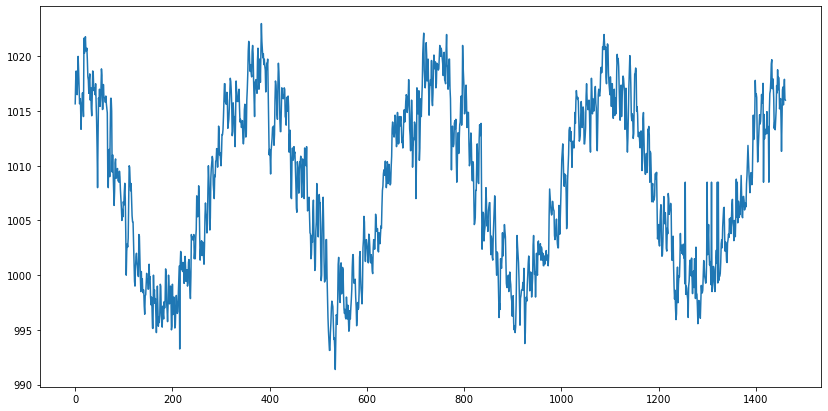

In [60]:
df['meanpressure'].plot(figsize=(14,7))

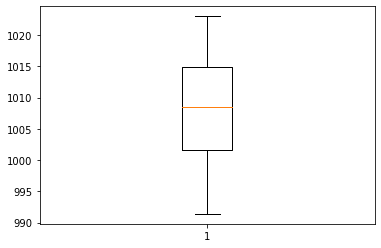

In [61]:
plt.boxplot(df['meanpressure'])
plt.show()

In [62]:
median1 = df.loc[df['meanpressure']<1050, 'meanpressure'].median()

In [63]:
df.loc[df['meanpressure']>1050,'meanpressure'] = np.nan

In [64]:
df.loc[df['meanpressure']<960,'meanpressure']=np.nan
df['meanpressure'].fillna(median1,inplace=True)

<AxesSubplot:>

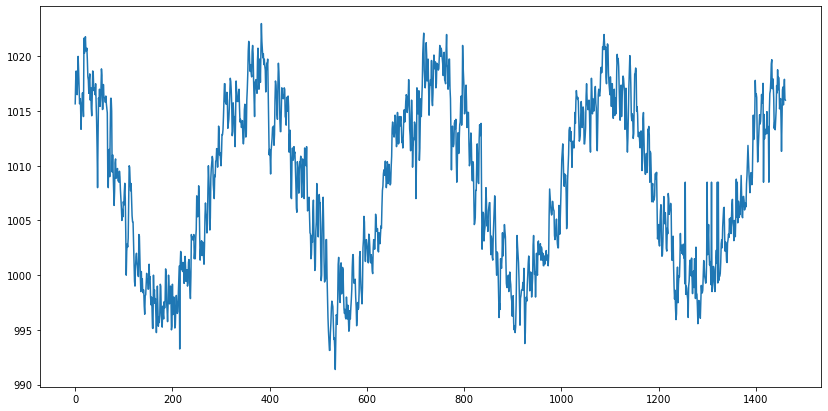

In [65]:
df['meanpressure'].plot(figsize=(14,7))

<AxesSubplot:>

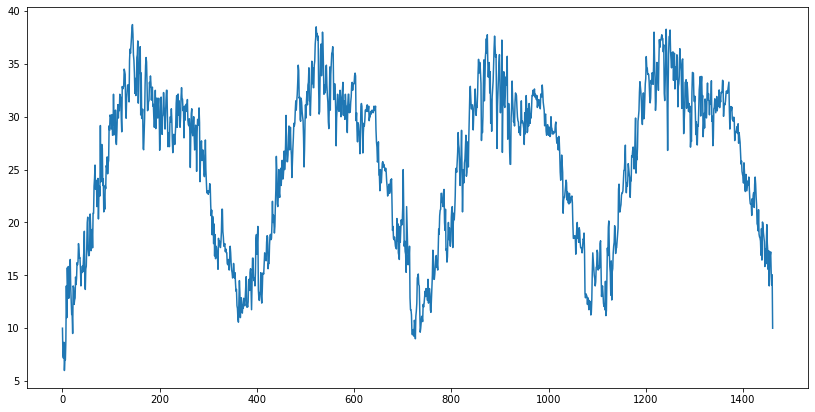

In [66]:
df['meantemp'].plot(figsize=(14,7))

<AxesSubplot:>

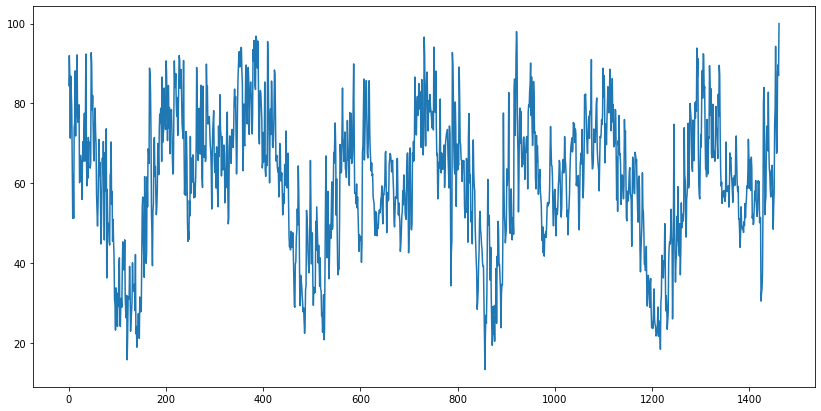

In [67]:
df['humidity'].plot(figsize=(14,7))

<AxesSubplot:>

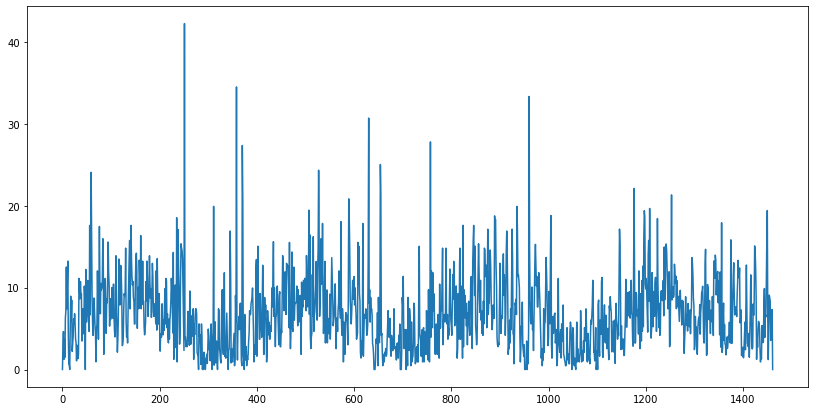

In [70]:
df['wind_speed'].plot(figsize=(14,7))

In [85]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [101]:
# data = data.drop([1461])
df = df.drop([1461])
total =  pd.concat([df,df_test])
total = total.reset_index()

In [110]:
total[1461:]

,index,date,meantemp,humidity,wind_speed,meanpressure
1461,0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1462,1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
1463,2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
1464,3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
1465,4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...,...
1570,109,2017-04-20,34.500000,27.500000,5.562500,998.625000
1571,110,2017-04-21,34.250000,39.375000,6.962500,999.875000
1572,111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
1573,112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [112]:
from gluonts.dataset.common import ListDataset
training_data = ListDataset(
    [{'start':'2013-01-01', 'target':df['meantemp'] }],
    freq='1d'

)

In [121]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer

estimator = DeepAREstimator(
    freq='1d', 
    prediction_length=114,
     trainer=Trainer(
        ctx="cpu",
        epochs=10,
        learning_rate=1e-3,
        num_batches_per_epoch=100
    )

)

predictor = estimator.train(training_data=training_data)


100%|██████████████████████████████████████████████| 100/100 [00:17<00:00,  5.63it/s, epoch=10/10, avg_epoch_loss=1.78]


In [122]:
test_data = ListDataset(
    [{'start':'2013-01-01' , 'target':total[:1574]['meantemp']}],
    freq = '1d'
)

In [123]:
from gluonts.evaluation import make_evaluation_predictions

forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_data,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)

In [124]:
tss = list(ts_it)
forecasts = list(forecast_it)

In [125]:

def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 150
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

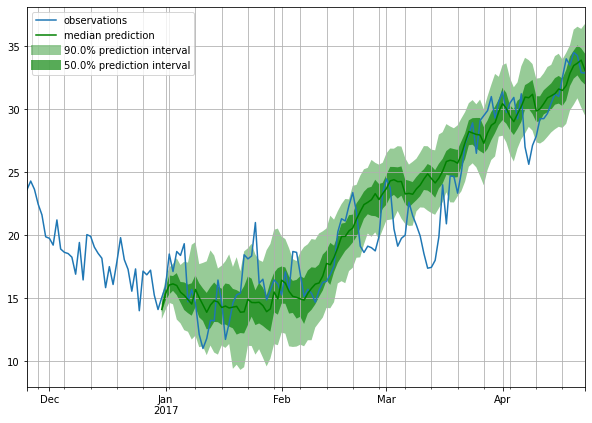

In [126]:
plot_prob_forecasts(tss[0], forecasts[0])

In [130]:
from gluonts.evaluation import Evaluator
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(test_data))

Running evaluation: 100%|███████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 200.03it/s]


In [132]:
item_metrics

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,NaN,6.628355,225.623306,2458.343506,21.564417,1.236846,1.60016,0.10241,0.099079,14.685344,145.198864,0.219298,225.623291,0.526316,91.814519,0.877193


In [131]:
agg_metrics

{'MSE': 6.628355327405427,
 'abs_error': 225.62330627441406,
 'abs_target_sum': 2458.343505859375,
 'abs_target_mean': 21.56441671806469,
 'seasonal_error': 1.2368459407395904,
 'MASE': 1.6001603305915542,
 'MAPE': 0.10240967231884338,
 'sMAPE': 0.09907936631587513,
 'MSIS': 14.6853437694686,
 'QuantileLoss[0.1]': 145.19886417388915,
 'Coverage[0.1]': 0.21929824561403508,
 'QuantileLoss[0.5]': 225.623291015625,
 'Coverage[0.5]': 0.5263157894736842,
 'QuantileLoss[0.9]': 91.81451854705809,
 'Coverage[0.9]': 0.8771929824561403,
 'RMSE': 2.574559249154198,
 'NRMSE': 0.11938923657496696,
 'ND': 0.09177859226615356,
 'wQuantileLoss[0.1]': 0.05906370034448513,
 'wQuantileLoss[0.5]': 0.0917785860592142,
 'wQuantileLoss[0.9]': 0.0373481241853392,
 'mean_absolute_QuantileLoss': 154.21222457885742,
 'mean_wQuantileLoss': 0.06273013686301285,
 'MAE_Coverage': 0.05614035087719299,
 'OWA': nan}